In [1]:
import tensorflow as tf

In [3]:
from PIL import Image as ig

In [4]:
vari1= ig.open('/Users/kulasekharmaganti/SummerProjects/Yash and Kula Summer projects/emotion detection dataset/test/angry/im87.png')

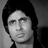

In [5]:
vari1

In [7]:
import numpy as np

In [10]:
img = vari1.getdata()

In [9]:
img

In [11]:
img_arr = np.array(img)

In [13]:
print(img_arr.shape)

(2304,)


In [16]:
np.max(img_arr)

208

In [18]:
ig_arr = img_arr/255

In [21]:
np.min(ig_arr)
np.max(ig_arr)

0.8156862745098039

In [22]:
n_classes = 7

In [23]:
import os

In [24]:
os.listdir()

['Untitled1.ipynb',
 'emotion detection dataset',
 '.DS_Store',
 'Untitled.ipynb',
 'PILimage.ipynb',
 '.ipynb_checkpoints']

In [27]:
path = os.listdir(os.listdir()[1])
print(path)

['.DS_Store', 'test', 'train']


In [28]:
path_test = os.listdir()[1] + '/' + path[1]

In [52]:
path_train = os.listdir()[1] + '/' + path[2]

In [29]:
path_test

'emotion detection dataset/test'

In [30]:
os.listdir(path_test)

['happy',
 '.DS_Store',
 'sad',
 'fearful',
 'neutral',
 'angry',
 'disgusted',
 'surprised']

In [33]:
classes = os.listdir(path_test)

In [36]:
classes.remove(".DS_Store")

In [37]:
classes

['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']

In [38]:
n_classes = len(classes)

In [39]:
n_classes

7

In [53]:
X_test = []
y_test = []
X_train = []
y_train = []

for i in range(n_classes):
    temp_path = path_train + '/' + classes[i]
    current_image_path = os.listdir(temp_path)
    for j in range(len(current_image_path)):
        if current_image_path[j]=='.DS_Store':
            pass
        else:
            current_image = np.array(ig.open(temp_path + '/' + current_image_path[j]).getdata())
            X_train.append(current_image)
            y_train.append(classes[i])

In [54]:
for i in range(n_classes):
    temp_path = path_test + '/' + classes[i]
    current_image_path = os.listdir(temp_path)
    for j in range(len(current_image_path)):
        if current_image_path[j]=='.DS_Store':
            pass
        else:
            current_image = np.array(ig.open(temp_path + '/' + current_image_path[j]).getdata())
            X_test.append(current_image)
            y_test.append(classes[i])

In [58]:
len(X_test)

7178


In [56]:
len(y_test)

7178

In [59]:
len(X_train)

28709

In [60]:
len(y_train)

28709